Diabetes Dataset: https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset?resource=download

In [14]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

**Filtering the Dataset**


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("alexteboul/diabetes-health-indicators-dataset")

print("Path to dataset files:", path)

100%|██████████| 6.03M/6.03M [00:00<00:00, 47.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/alexteboul/diabetes-health-indicators-dataset/versions/1


In [5]:
def prepare_data(dataset_path, target_column):
    diabetes_df = pd.read_csv(dataset_path)

    diabetes_df = diabetes_df.sample(frac=1, random_state=42).reset_index(drop=True)

    X = diabetes_df.drop(columns=[target_column])
    y = diabetes_df[target_column]

    split_index = int(0.8 * len(diabetes_df))
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    return X_train, X_test, y_train, y_test

In [6]:
def train_and_evaluate_tree(X_train, y_train, X_test, y_test, max_depth=3):
    T = DecisionTreeClassifier(max_depth=max_depth, class_weight='balanced')
    T.fit(X_train, y_train)

    train_score = T.score(X_train, y_train)
    test_score = T.score(X_test, y_test)

    return T, train_score, test_score

In [15]:
def plot_confusion_matrix(model, X_test, y_test):
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues', values_format='d')

    plt.title("Confusion Matrix")
    plt.show()

In [7]:
dataset_path = path + "/diabetes_012_health_indicators_BRFSS2015.csv"
target_column = 'Diabetes_012'

In [8]:
X_train, X_test, y_train, y_test = prepare_data(dataset_path, target_column)

In [9]:
T, train_score, test_score = train_and_evaluate_tree(X_train, y_train, X_test, y_test, max_depth=3)

In [10]:
print('Score on train:', train_score)
print('Score on test:', test_score)

Score on train: 0.653914380321665
Score on test: 0.6504848628193


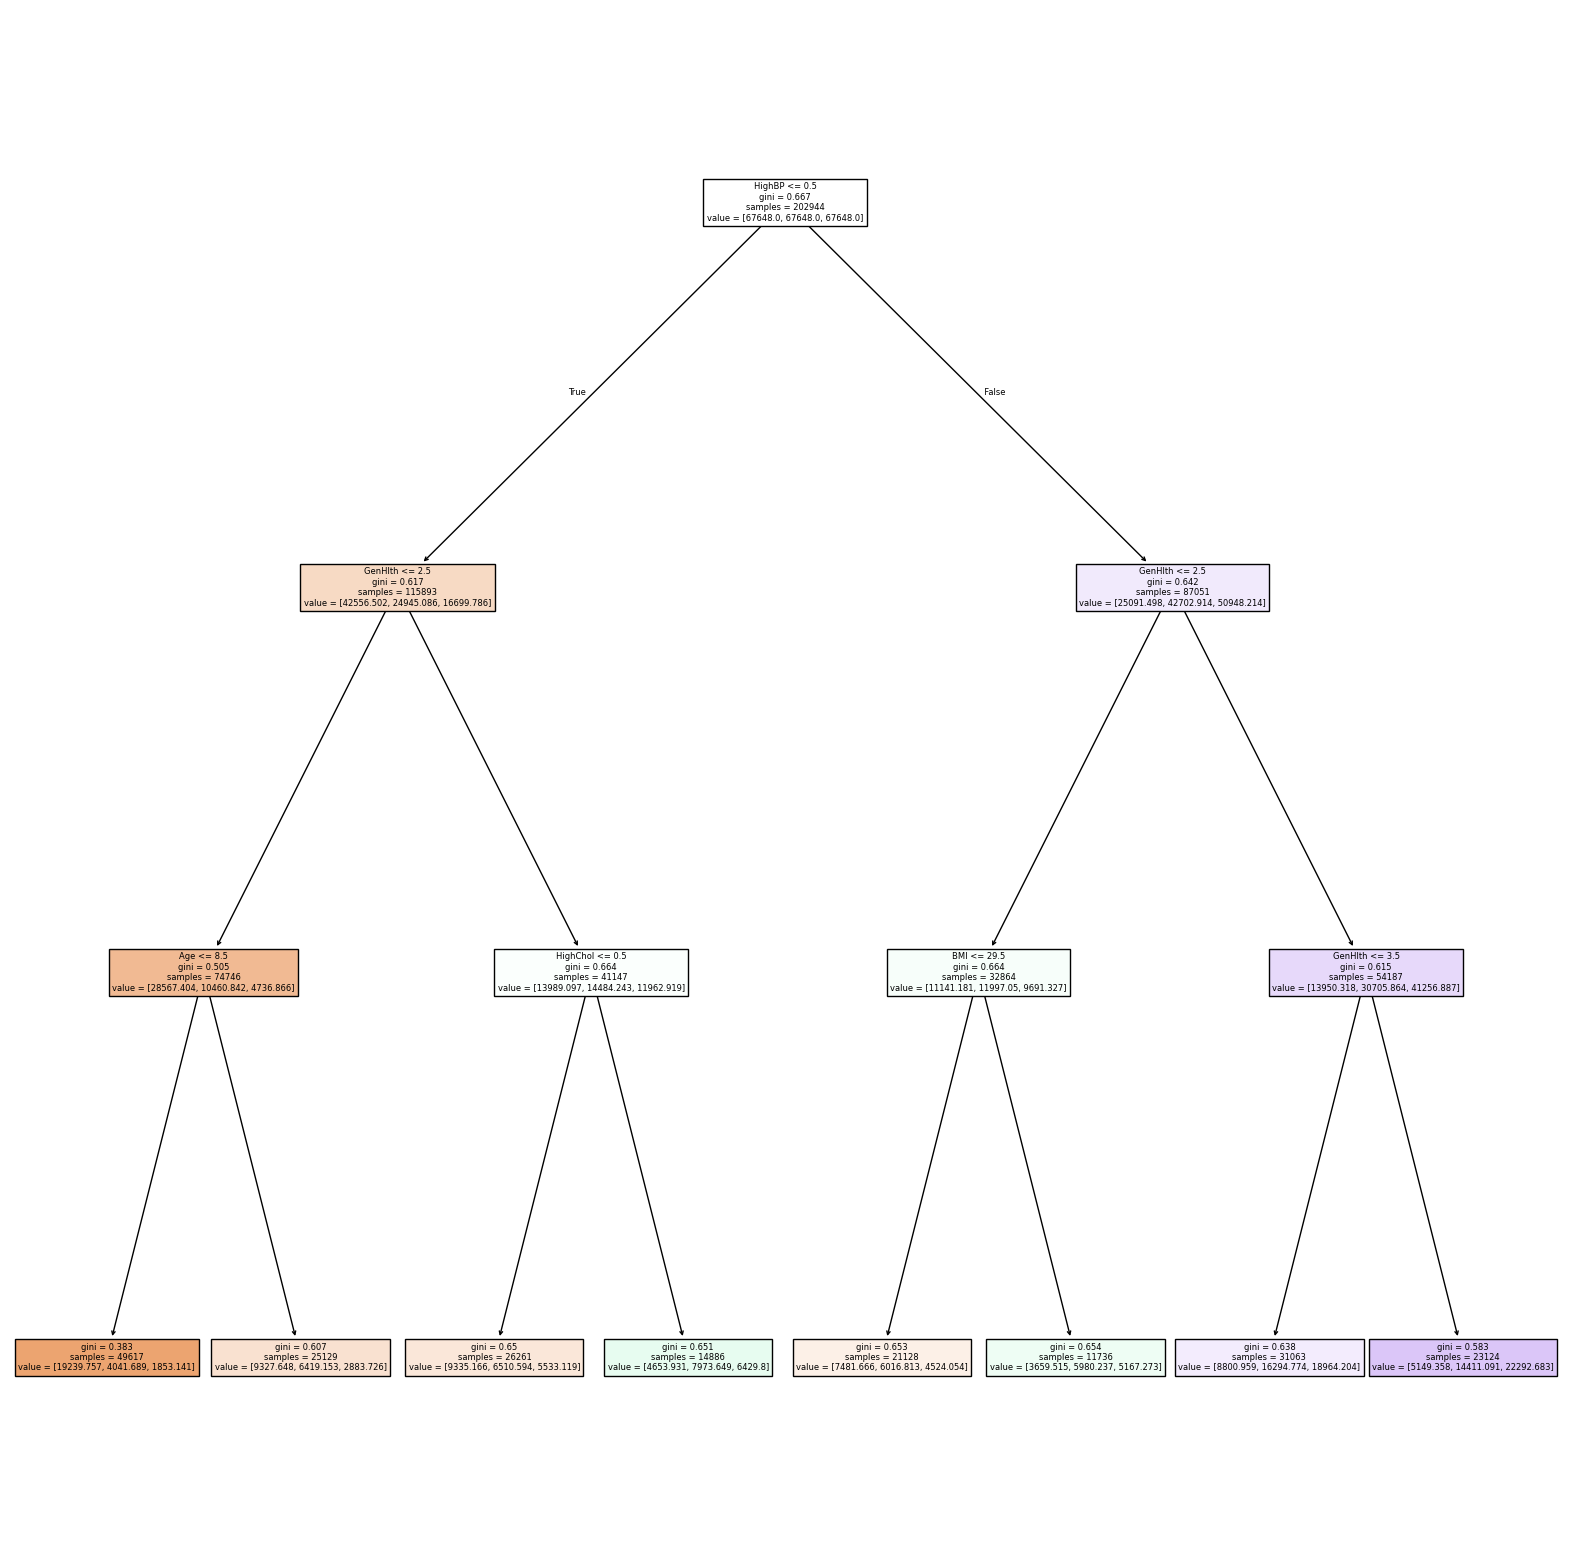

In [11]:
fig, ax = plt.subplots(1, figsize=(20, 20))
p = plot_tree(T, filled=True, feature_names=X_train.columns)
plt.show()

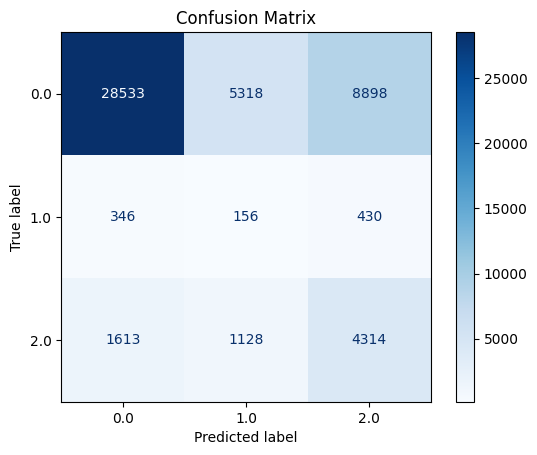

In [16]:
plot_confusion_matrix(T, X_test, y_test)